# Titanic - Machine Learning from Disaster

## K-Nearest Neighbors

In [1]:
import pandas as pd

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,0
1,1,1,0,38.0,1,0,596,71.28,0,0
2,1,3,0,26.0,0,0,669,7.92,2,0
3,1,1,0,35.0,1,0,49,26.55,2,0
4,0,3,1,35.0,0,0,472,8.05,2,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,0
887,1,1,0,19.0,0,0,14,30.00,2,0
888,0,3,0,29.0,1,2,675,11.72,2,0
889,1,1,1,26.0,0,0,8,30.00,0,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived", "Age", "Fare"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 7), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 7), (223,))

**Replace categorical to numeric representation**

**Split dataset into train and test sets**


In [8]:
X_test.shape, y_test.shape

((223, 7), (223,))

### K-Nearest Neighbors

In [9]:
from common import functions as func
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis

**Building, train and predict model**

In [10]:
pipeline_clf = make_pipeline(
    StandardScaler(), 
    NeighborhoodComponentsAnalysis(), 
    KNeighborsClassifier())

pipeline_clf.fit(X_train, y_train)
y_predict = pipeline_clf.predict(X_test)

func.show_model_result(pipeline_clf, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.7877095  0.76966292 0.83707865 0.83146067 0.84269663]
Mean = 0.81 / Standard Deviation = 0.03

Confunsion Matrix
----------------------------------------------------------------------
[[114  20]
 [ 30  59]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       134
           1       0.75      0.66      0.70        89

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223

----------------------------------------------------------------------
Accuracy: 0.78
Precicion: 0.75
Sensitivity aka Recall: 0.66
F1-Score: 0.70


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.76
----------------------------------------------------------------------


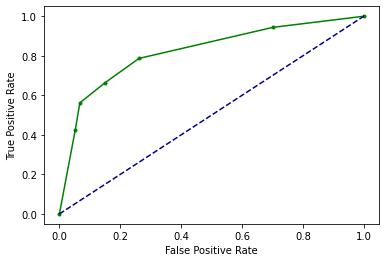

In [11]:
label = "K-Nearest Neighbor"
func.show_curve_roc(pipeline_clf, X_test, y_test, y_predict, label=label)